# **This dataset is the Mushroom Dataset for Binary Classification Available at UCI Library. This data set contains 9 columns**

    



**Cap Diameter:** The width of the mushroom's cap, measured across the widest point.

**Cap Shape:** The overall form or appearance of the mushroom's cap, which can vary from convex to flat to
              depressed.
              
**Gill Attachment:** How the gills of the mushroom are connected to the stem, ranging from attached to free.

**Gill Color:** The color of the gills, which can be various shades such as white, pink, brown, or black.

**Stem Height:** The vertical length of the mushroom's stem from the base to the cap.

**Stem Width:** The diameter of the mushroom's stem, measured at its widest point.

**Stem Color:** The coloration of the mushroom's stem, which can range from white to brown to yellow.

**Season:** The time of year when the mushroom typically grows or is most commonly found.

**Target Class** - Is it edible or not?

The Target Class contains two values - 0 or 1 - where 0 refers to edible and 1 refers to poisonous.

# IMPORTING NECESSARY LIBRARIES

In [79]:
!pip install keras tensorflow


In [80]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import classification_report 
from sklearn.preprocessing import MinMaxScaler

In [81]:
#loading dataset
df = pd.read_csv("mushroom.csv")

# BASIC INFORMATION

In [3]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [4]:
df.describe

<bound method NDFrame.describe of        cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0              1372          2                2          10     3.807467   
1              1461          2                2          10     3.807467   
2              1371          2                2          10     3.612496   
3              1261          6                2          10     3.787572   
4              1305          6                2          10     3.711971   
...             ...        ...              ...         ...          ...   
54030            73          5                3           2     0.887740   
54031            82          2                3           2     1.186164   
54032            82          5                3           2     0.915593   
54033            79          2                3           2     1.034963   
54034            72          5                3           2     1.158311   

       stem-width  stem-color    season  class  
0   

In [5]:
df.shape

(54035, 9)

In [6]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

In [7]:
len(df)

54035

# DATA PREPROCESSING

In [82]:
#Miss Valuse
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [83]:
#Duplicated value 
data_dup = df.duplicated().any()
data_dup

True

In [84]:
df = df.drop_duplicates()

In [85]:
len(df)

53732

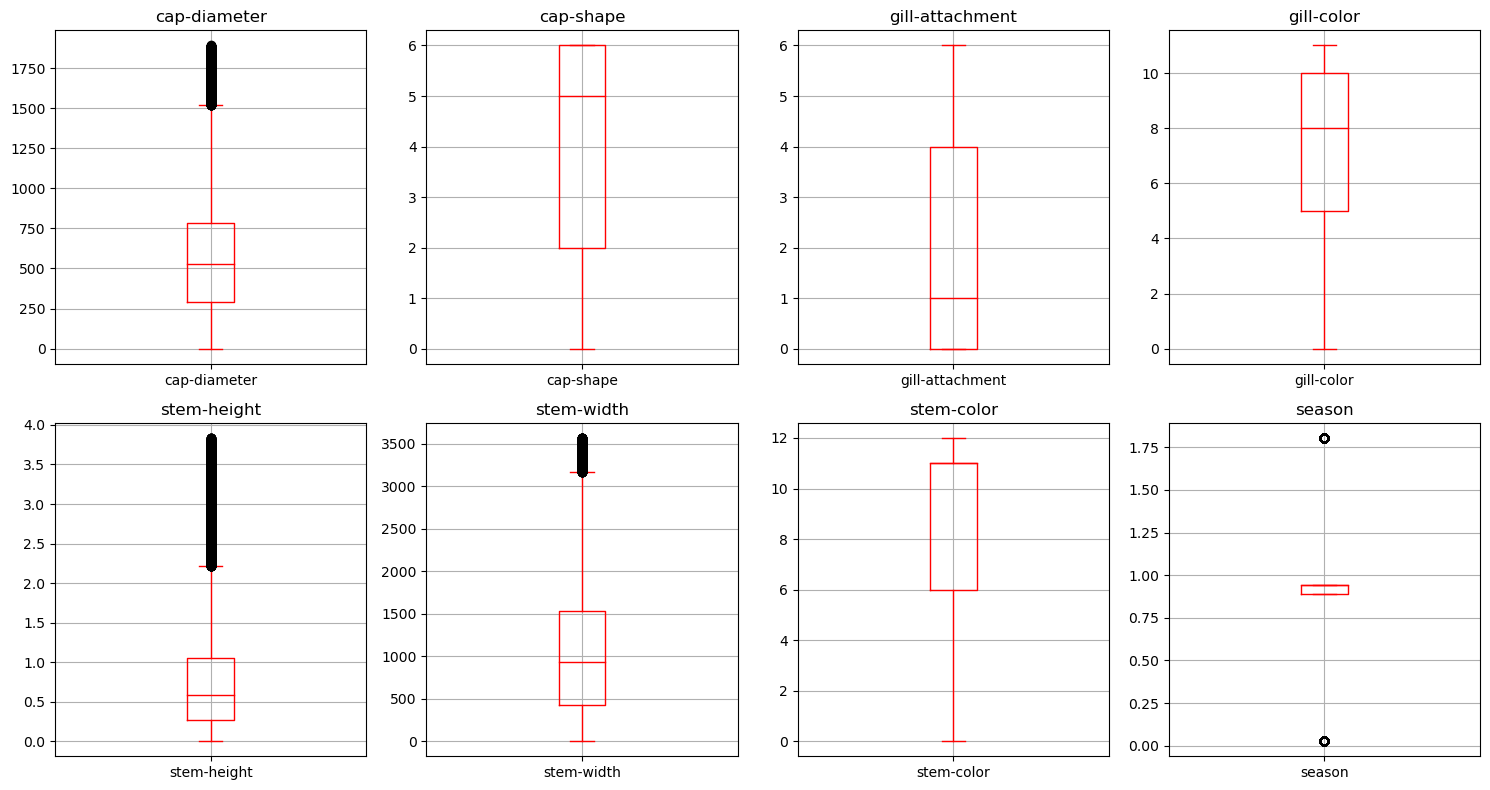

In [86]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axs = axs.flatten()

columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
           'stem-height', 'stem-width', 'stem-color', 'season']

for i, column in enumerate(columns):
    df.boxplot(column, ax=axs[i], color='Red')  
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

# DATA VISULIZATION

In [13]:
#checking counts for the different classes
df['class'].value_counts()

1    29372
0    24360
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

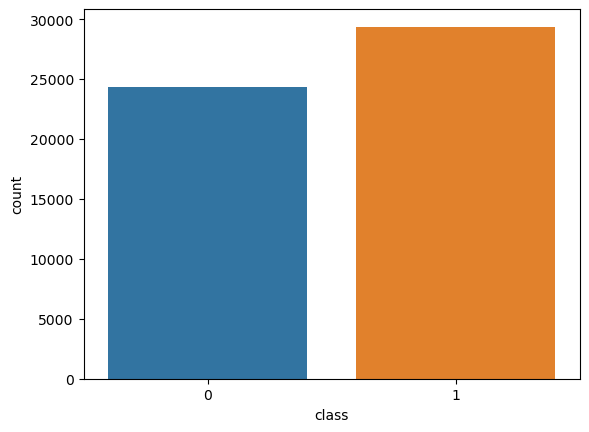

In [11]:
sns.countplot(data =df, x = 'class')

In [12]:
df.head(2)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1


In [75]:
# # Define a function to plot pie charts for each feature
# def plot_pie_charts(df, features):
#     for feature in features:
#         feature_counts = df[feature].value_counts()

#         # Create a pie chart
#         plt.figure(figsize=(6, 6))
#         plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=140)
#         plt.title(f'Distribution of {feature}')
#         plt.show()

# # List of features to plot
# features = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']

# # Plot the pie charts
# plot_pie_charts(df, features)

In [14]:

# # Initialize figure and axes
# plt.figure(figsize=(15, 10))

# # Iterate through each feature column (excluding 'class')
# features = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 
#             'stem-height', 'stem-width', 'stem-color', 'season']
# for i, feature in enumerate(features, start=1):
#     plt.subplot(3, 3, i)
#     sns.countplot(x=feature, hue='class', data=df)
#     plt.title(f'{feature.capitalize()} Distribution')

# # Adjust layout
# plt.tight_layout()

# # Show plot
plt.show()

**Observation**
The data seems to be balanced and contain two classes

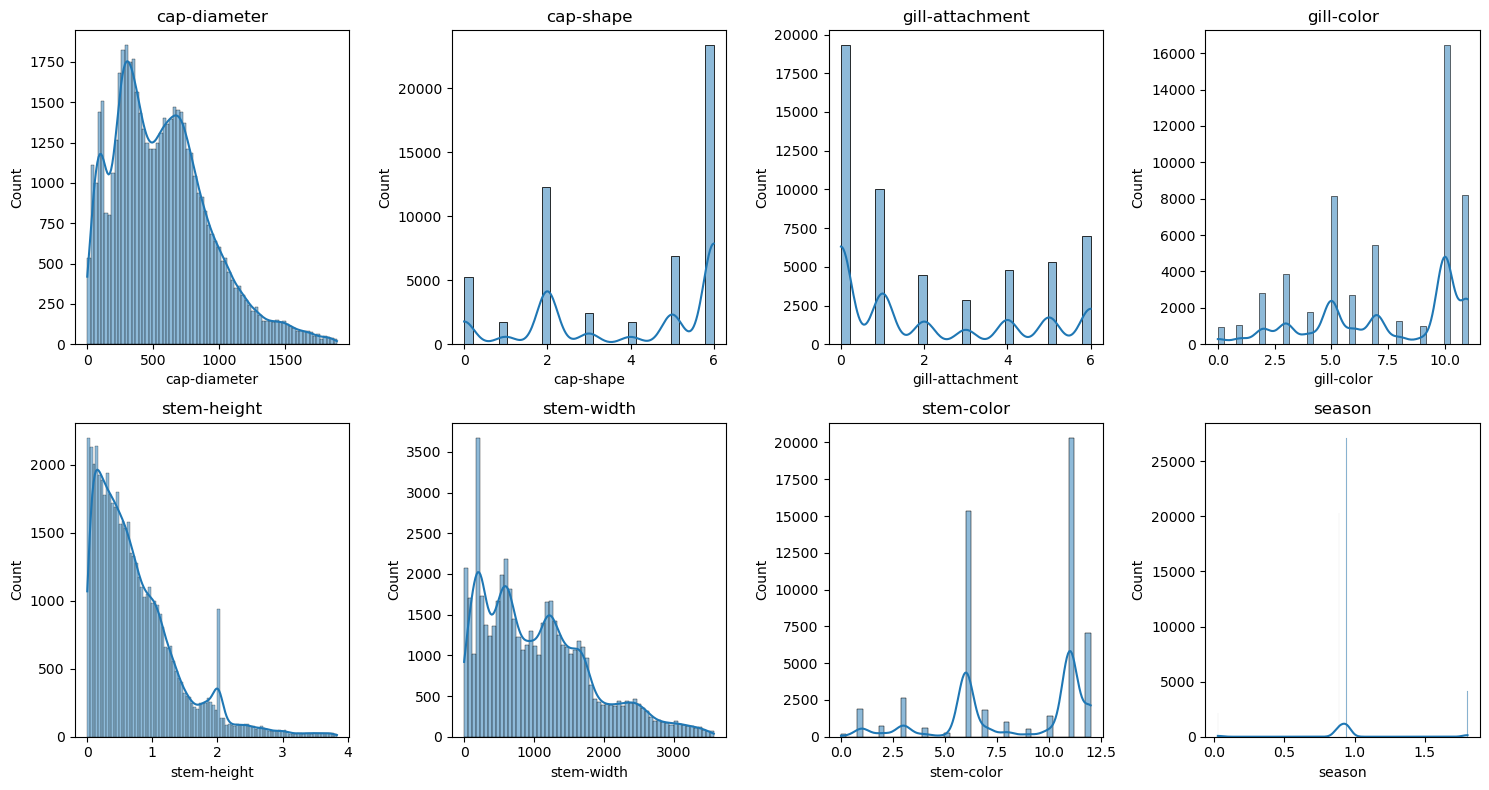

In [15]:
#plotting the histogram for the dataset
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
           'stem-height', 'stem-width', 'stem-color', 'season']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.histplot(df[column], ax=axs[i], kde=True)  
    axs[i].set_title(column)  

plt.tight_layout()  
plt.show() 

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame containing the data
sns.pairplot(df, hue='class')
plt.suptitle('Pair Plot of All Columns', y=1.02)
plt.show()

# Spliting and transforming data set

In [87]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [88]:
# df_normalized.head()

In [89]:
#spliting data into test and train
X = df.iloc[:,0:8]
Y = df.iloc[:,8]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size = 0.2)

In [90]:
#Transforming data 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# KNN

In [91]:
#creating the knn model
classifier = KNeighborsClassifier(n_neighbors = 5,p=2,metric = 'minkowski')
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

In [92]:
#predict the test set results
Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 1 0 ... 1 0 1]


**Evaluating the model**

**1. Confusion matrix**

In [93]:
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[4767   93]
 [  51 5836]]


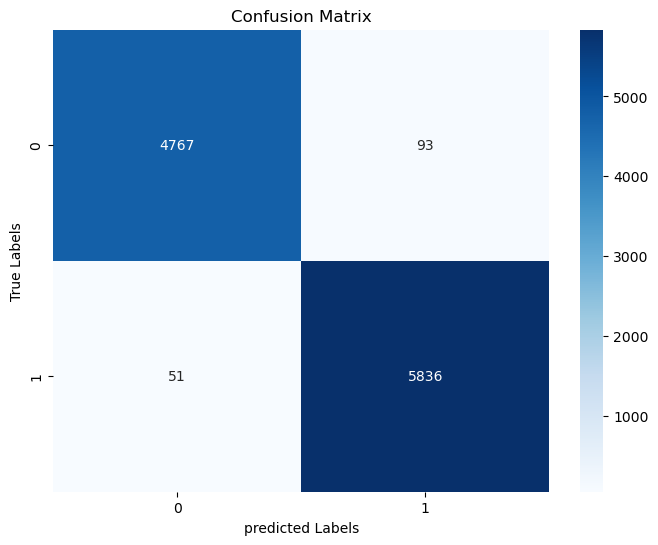

In [94]:
class_labels = np.unique(Y_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot = True,cmap='Blues',fmt = 'g',xticklabels = class_labels, yticklabels= class_labels)
plt.xlabel("predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

**2.Accuracy**

In [95]:
knn_accuracy = accuracy_score(Y_test,Y_pred)*100
knn_accuracy


98.66009118823857

**3.Precision**

In [96]:
knn_precision = precision_score(Y_test, Y_pred, average='weighted')*100
knn_precision

98.66208442295765

**4.Recall**

In [97]:
knn_recall=recall_score(Y_test,Y_pred,average='weighted')*100
knn_recall

98.66009118823857

**5.F1 Score**

In [98]:
knn_f1 = f1_score(Y_test,Y_pred,average='weighted')*100
knn_f1

98.65956511508598

In [99]:
print('Accuracy :',knn_accuracy,'\nPrecision :',knn_precision,'\nRecall :',knn_recall,'\nF1 Score :', knn_f1)

Accuracy : 98.66009118823857 
Precision : 98.66208442295765 
Recall : 98.66009118823857 
F1 Score : 98.65956511508598


**6.Classification Report**

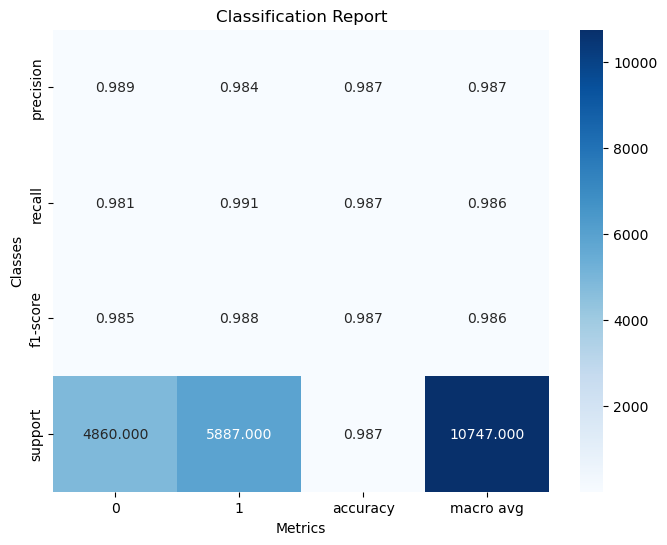

In [100]:
report = classification_report(Y_test, classifier.predict(X_test), output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".3f")
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [28]:
Y_pred = clf.predict(X_test)

In [29]:
from sklearn import metrics 
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(Y_test, Y_pred))


ACCURACY OF THE MODEL: 0.9885549455662045


In [22]:
df.head(2)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1


# SVM

In [30]:
dfnew = pd.DataFrame(df)

df0 = dfnew[dfnew['class']==0]
df1 = dfnew[dfnew['class']==1]


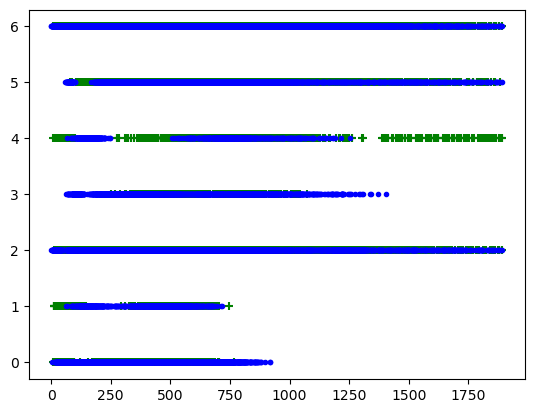

In [31]:
plt.scatter(df0['cap-diameter'],df0['cap-shape'],color='green',marker='+')
plt.scatter(df1['cap-diameter'],df1['cap-shape'],color='blue',marker='.')

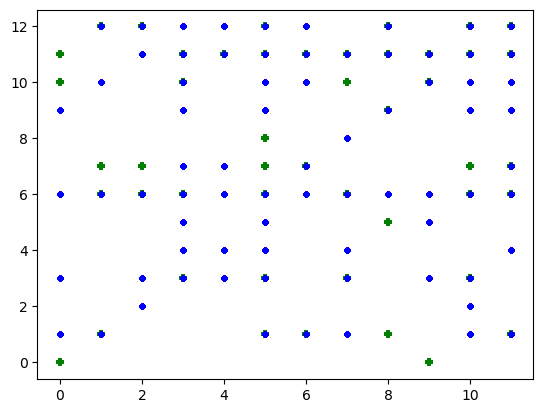

In [32]:
plt.scatter(df0['gill-color'],df0['stem-color'],color='green',marker='+')
plt.scatter(df1['gill-color'],df1['stem-color'],color='blue',marker='.')

In [33]:
#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, Y_train)

SVC(gamma=0.1, random_state=0)

In [34]:
n_support_vectors = svm.n_support_

# Total number of support vectors across all classes
total_support_vectors = sum(n_support_vectors)

print("Number of support vectors:", total_support_vectors)
intercept = svm.intercept_
print("intercept is ",intercept)

Number of support vectors: 18507
intercept is  [0.38721159]


# Evaluating model

In [35]:
Y_pred_svm = svm.predict(X_test)
print(Y_pred_svm)

[0 1 1 ... 1 0 1]


**1.Confusion Matrix**

In [36]:
cm = confusion_matrix(Y_test, Y_pred_svm)
print(f'CM:',cm)


CM: [[4202  658]
 [ 693 5194]]


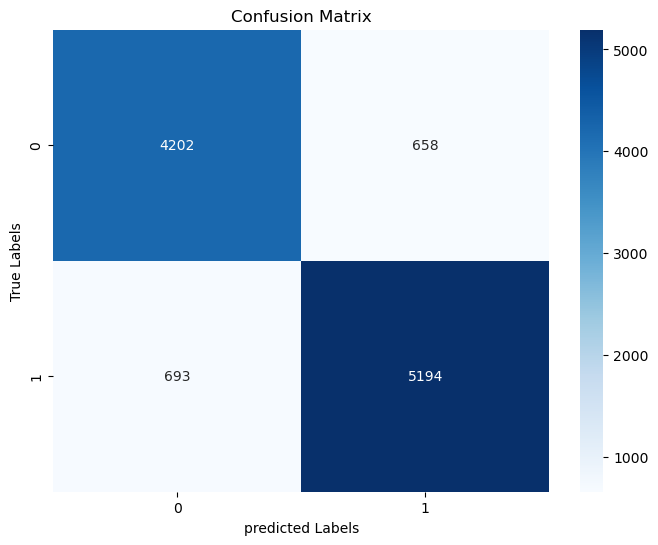

In [37]:
class_labels = np.unique(Y_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot = True,cmap='Blues',fmt = 'g',xticklabels = class_labels, yticklabels= class_labels)
plt.xlabel("predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

**2.Accuracy**

In [38]:
svm_accuracy = accuracy_score(Y_test, Y_pred_svm)* 100
svm_accuracy

87.42904996743277

**3.Precision**

In [39]:
svm_precision = precision_score(Y_test, Y_pred_svm, average='weighted')*100
svm_precision

87.43853772663266

**4.Recall**

In [40]:
svm_recall = recall_score(Y_test,Y_pred_svm,average='weighted')*100

**F1 Score**

In [41]:
svm_f1 = f1_score(Y_test,Y_pred_svm,average='weighted')*100
svm_f1

87.43286141052933

In [42]:
print('Accuracy :',svm_accuracy,'\nPrecision :',svm_precision,'\nRecall :',svm_recall,'\nF1 Score :',svm_f1)

Accuracy : 87.42904996743277 
Precision : 87.43853772663266 
Recall : 87.42904996743277 
F1 Score : 87.43286141052933


In [43]:
print(classification_report(Y_test, svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4860
           1       0.89      0.88      0.88      5887

    accuracy                           0.87     10747
   macro avg       0.87      0.87      0.87     10747
weighted avg       0.87      0.87      0.87     10747



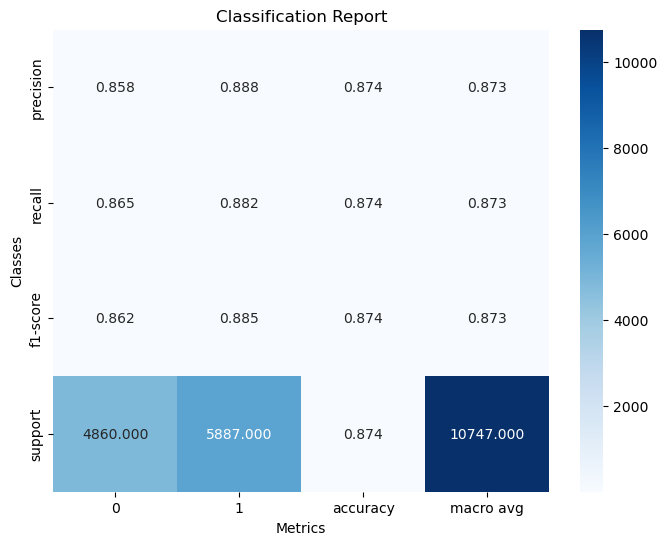

In [44]:
report = classification_report(Y_test, svm.predict(X_test), output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".3f")
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

# Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(criterion = 'gini',max_depth=3, random_state=42, min_samples_leaf = 8)


# fit the grid search to the data
tree.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, random_state=42)

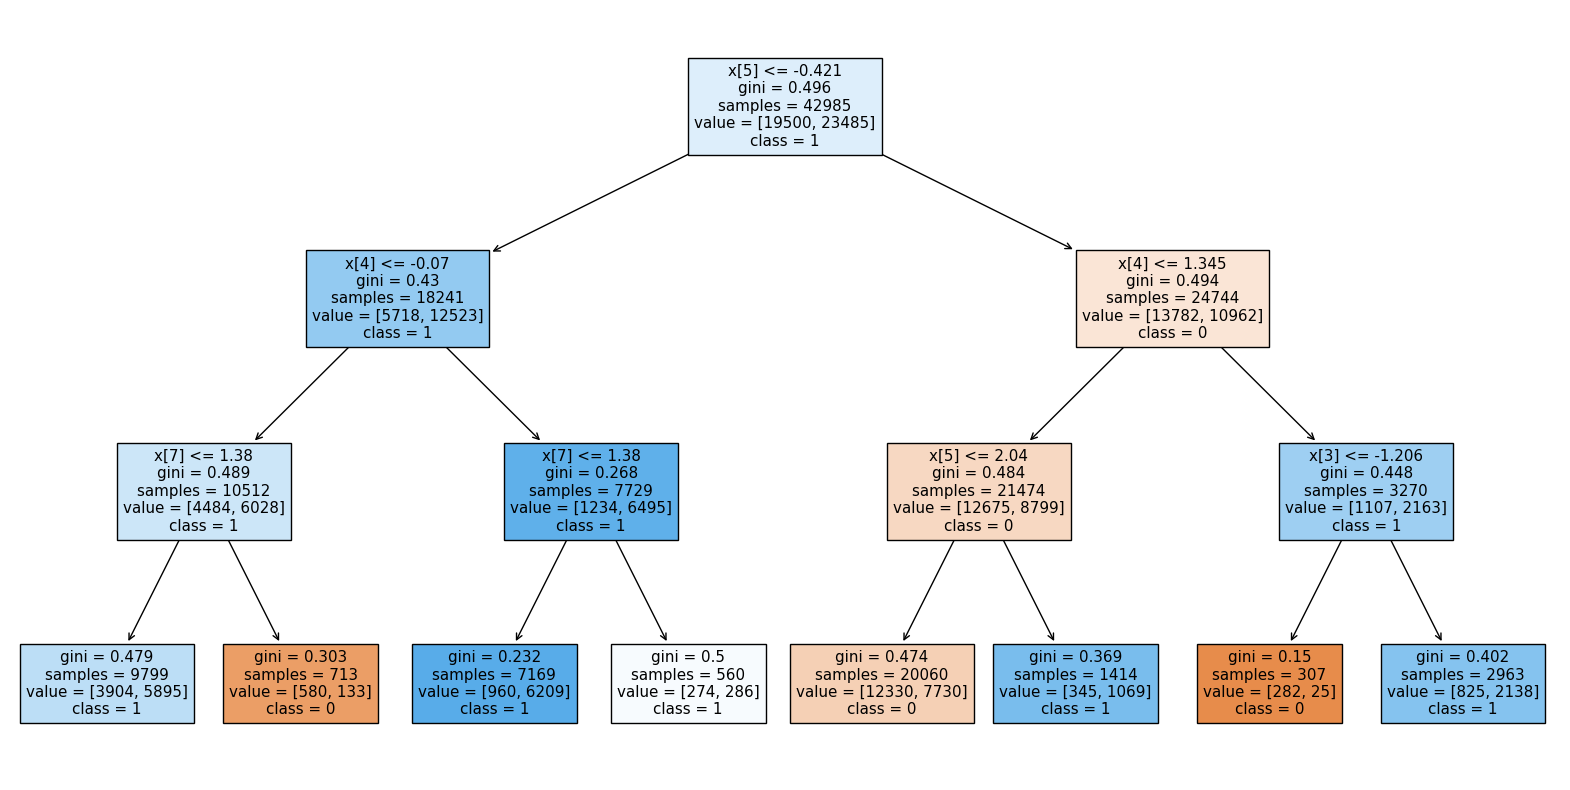

In [102]:
unique_classes = list(np.unique(Y_train))
unique_classes = [str(cls) for cls in unique_classes]  # Convert numpy.int64 to str
plt.figure(figsize=(20,10))
plot_tree(tree, class_names=unique_classes, filled=True)
plt.show()

In [103]:
#predicting the values
Y_pred_treeG = tree.predict(X_test)

# Evaluating the model

**1.Confusion Matrix**

In [104]:
cm = confusion_matrix(Y_test,Y_pred_treeG)
print(cm)

[[3225 1635]
 [2042 3845]]


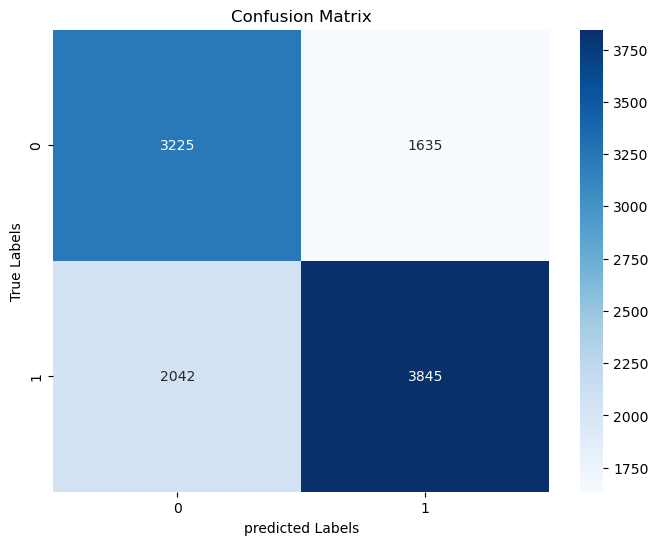

In [105]:
class_labels = np.unique(Y_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot = True,cmap='Blues',fmt = 'g',xticklabels = class_labels, yticklabels= class_labels)
plt.xlabel("predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

**2.Accuracy**

In [106]:
tree_ginni_accuracy = accuracy_score(Y_test, Y_pred_treeG)*100
tree_ginni_accuracy

65.78580068856425

**3.Precision**

In [107]:
tree_ginni_precision = precision_score(Y_test, Y_pred_treeG, average='weighted')*100
tree_ginni_precision

66.12413791762212

**4.Recall**

In [108]:
tree_ginni_recall = recall_score(Y_test,Y_pred_treeG,average='weighted')*100
tree_ginni_recall

65.78580068856425

**5.F1 Score**

In [109]:
tree_ginni_f1 = f1_score(Y_test, Y_pred_treeG, average='macro')*100
tree_ginni_f1

65.67154887829119

In [110]:
print('Accuracy :',tree_ginni_accuracy,'\nPrecision :',tree_ginni_precision,'\nRecall :',tree_ginni_recall,'\nF1 Score :',tree_ginni_f1)

Accuracy : 65.78580068856425 
Precision : 66.12413791762212 
Recall : 65.78580068856425 
F1 Score : 65.67154887829119


**Classification Report**

In [111]:
# classification report
from sklearn.metrics import classification_report

tree_report = classification_report(Y_test, Y_pred)
print(tree_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4860
           1       0.98      0.99      0.99      5887

    accuracy                           0.99     10747
   macro avg       0.99      0.99      0.99     10747
weighted avg       0.99      0.99      0.99     10747



**Decision Tree using entropy**

In [57]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=42, min_samples_leaf = 8)


# fit the grid search to the data
tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=8,
                       random_state=42)

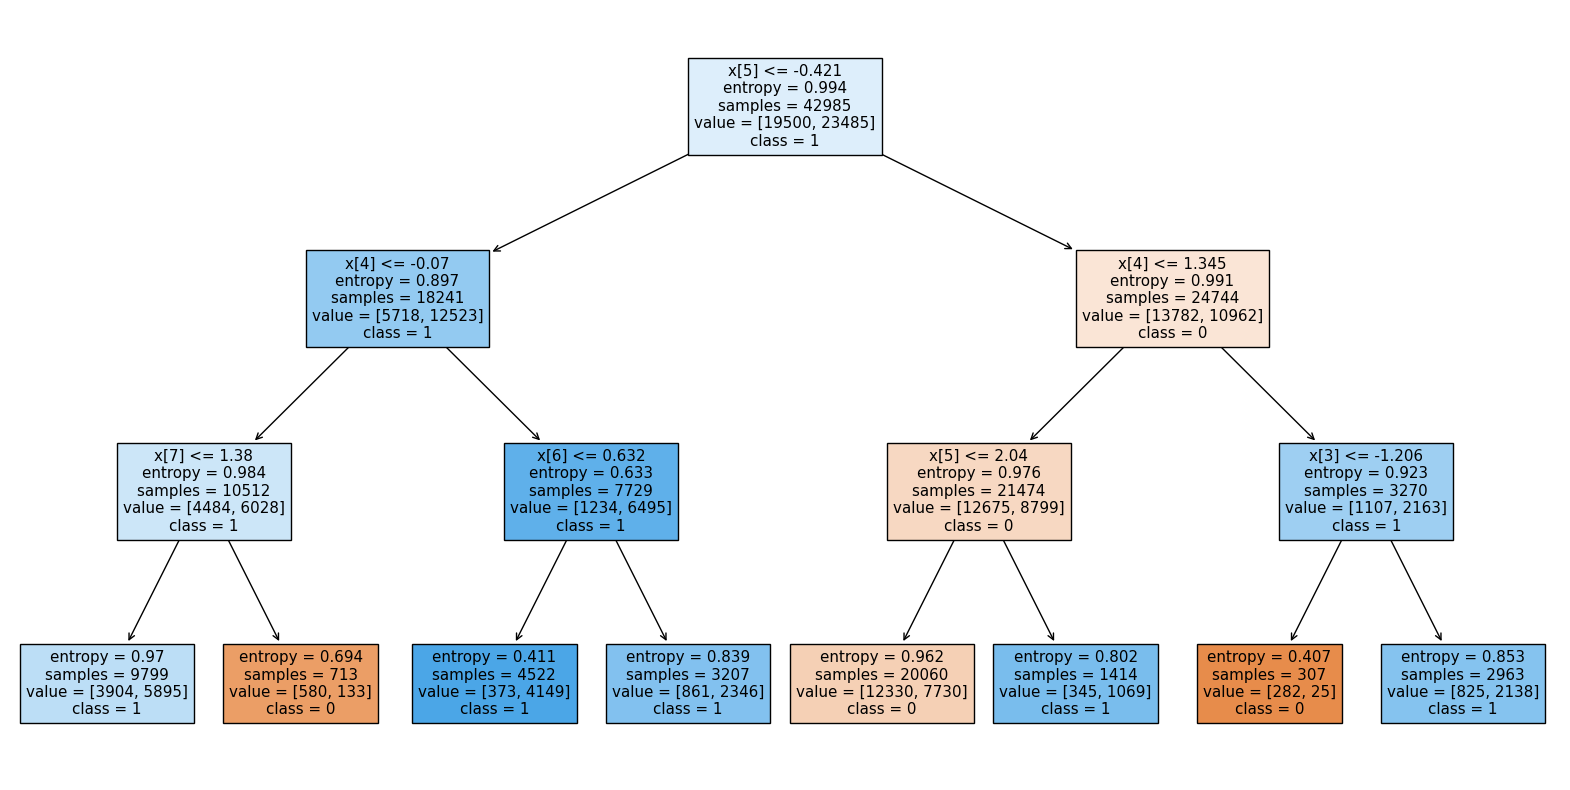

In [58]:
unique_classes = list(np.unique(Y_train))
unique_classes = [str(cls) for cls in unique_classes]  # Convert numpy.int64 to str
plt.figure(figsize=(20,10))
plot_tree(tree, class_names=unique_classes, filled=True)
plt.show()

In [59]:
#predicting the values
Y_pred_treeE = tree.predict(X_test)

**Evaluate the model**

**Accuracy**

In [60]:
tree_entropy_accuracy = accuracy_score(Y_test, Y_pred_treeE)*100
tree_entropy_accuracy

65.78580068856425

**Precision**

In [61]:
tree_entropy_precision = precision_score(Y_test, Y_pred_treeE, average='weighted')*100
tree_entropy_precision

66.12413791762212

**Recall**

In [62]:
tree_entropy_recall = recall_score(Y_test,Y_pred_treeE,average='weighted')*100
tree_entropy_recall

65.78580068856425

**F1 Score**

In [63]:
tree_entropy_f1 = f1_score(Y_test, Y_pred_treeE, average='macro')*100
tree_entropy_f1

65.67154887829119

In [64]:
print('Accuracy :',tree_entropy_accuracy,'\nPrecision :',tree_entropy_precision,'\nRecall :',tree_entropy_recall,'\nF1 Score :',tree_entropy_f1)

Accuracy : 65.78580068856425 
Precision : 66.12413791762212 
Recall : 65.78580068856425 
F1 Score : 65.67154887829119


In [65]:
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[4798   62]
 [  61 5826]]


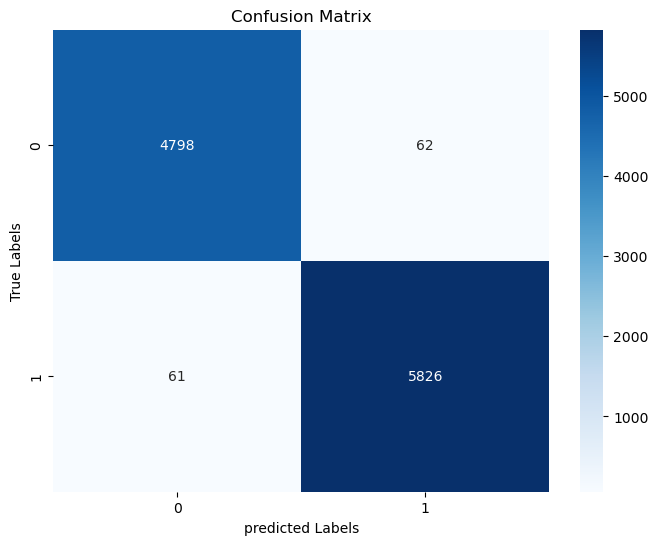

In [66]:
# visualize the confusion matrix using a heatmap

class_labels = np.unique(Y_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot = True,cmap='Blues',fmt = 'g',xticklabels = class_labels, yticklabels= class_labels)
plt.xlabel("predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Logistic Regression

**Creating Model**

In [67]:
from sklearn.preprocessing import MinMaxScaler

# create the MinMaxScaler object
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.transform(X_test)

In [68]:
from sklearn.linear_model import LogisticRegression

# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=2000)

logreg.fit(Xtrain_scaled, Y_train)

LogisticRegression(max_iter=2000, random_state=122)

In [69]:
#predicting
Y_pred_lr = logreg.predict(Xtest_scaled)

# Evaluating the model

**1.Confusion Matrix**

In [70]:
cm = confusion_matrix(Y_test,Y_pred_lr)
print(cm)

[[2626 2234]
 [1692 4195]]


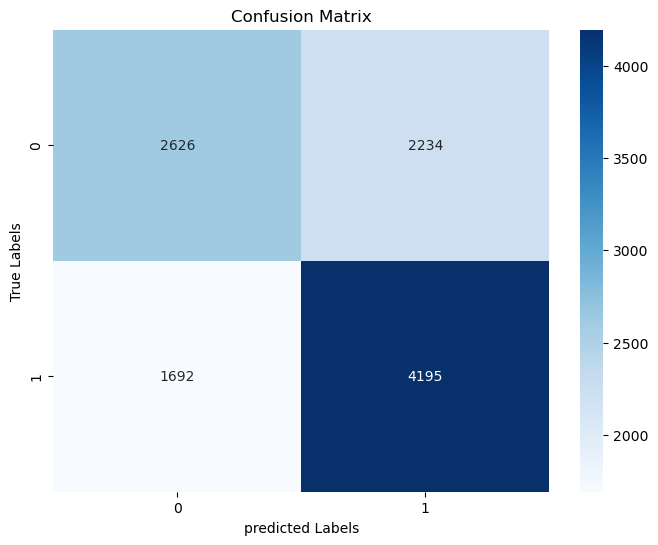

In [71]:
# visualize the confusion matrix using a heatmap

class_labels = np.unique(Y_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot = True,cmap='Blues',fmt = 'g',xticklabels = class_labels, yticklabels= class_labels)
plt.xlabel("predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

**2.Accuracy**

In [72]:
# evaluate the best model on the test set
logistic_accuracy = accuracy_score(Y_test, Y_pred_lr)*100
logistic_accuracy

63.46887503489346

**3.Precision**

In [73]:
logistic_precision = precision_score(Y_test, Y_pred_lr, average='weighted')*100
logistic_precision

63.24515500278577

**4.Recall**

In [74]:
logistic_recall=recall_score(Y_test,Y_pred_lr,average='weighted')*100
logistic_recall

63.46887503489346

**4.F1 Score**

In [75]:
logistic_f1 = f1_score(Y_test, Y_pred_lr, average='macro')*100
logistic_f1

62.67328158309006

In [76]:
print('Accuracy :',logistic_accuracy,'\nPrecision :',logistic_precision,'\nRecall :',logistic_recall,'\nF1 Score :',logistic_f1)

Accuracy : 63.46887503489346 
Precision : 63.24515500278577 
Recall : 63.46887503489346 
F1 Score : 62.67328158309006


**Classification Report**

In [77]:
# classification report
from sklearn.metrics import classification_report

tree_report = classification_report(Y_test, Y_pred)
print(tree_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4860
           1       0.99      0.99      0.99      5887

    accuracy                           0.99     10747
   macro avg       0.99      0.99      0.99     10747
weighted avg       0.99      0.99      0.99     10747



# Comparisions of all models : 

**1.Accuracy**

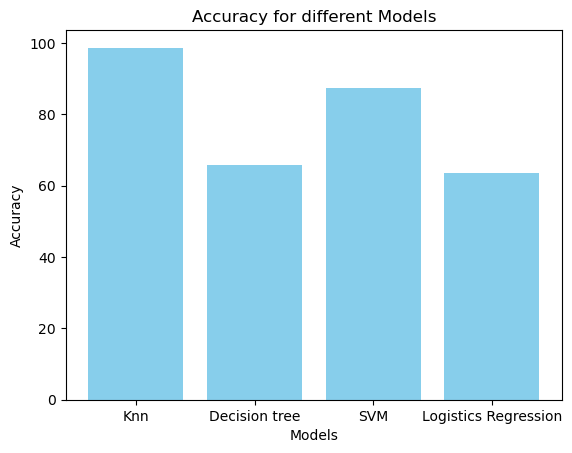

In [78]:

model_names = ['Knn','Decision tree','SVM','Logistics Regression']
accuracy = [knn_accuracy,tree_ginni_accuracy,svm_accuracy,logistic_accuracy]
x=np.arange(len(model_names))
plt.bar(x,accuracy,color = 'skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy for different Models')
plt.xticks(x,model_names)
plt.show()

**2. Precision**

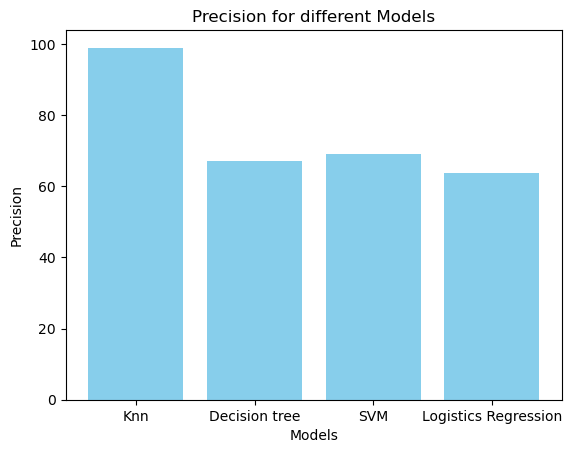

In [109]:
model_names = ['Knn','Decision tree','SVM','Logistics Regression']
Precision = [knn_precision,tree_ginni_precision,svm_precision,logistic_precision]
x=np.arange(len(model_names))
plt.bar(x,Precision,color = 'skyblue')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision for different Models')
plt.xticks(x,model_names)
plt.show()

**3.Recall**

In [111]:
model_names = ['Knn','Decision tree','SVM','Logistics Regression']
recall = [knn_recall,tree_ginni_recall,svm_recall,logistic_recall]
x=np.arange(len(model_names))
plt.bar(x,recall,color = 'skyblue')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Accuracy for different Models')
plt.xticks(x,model_names)
plt.show()

NameError: name 'svm_recall' is not defined

**4. F1 Score**

In [112]:
model_names = ['Knn','Decision tree','SVM','Logistics Regression']
f1 = [knn_f1,tree_ginni_f1,svm_f1,logistic_f1]
x=np.arange(len(model_names))
plt.bar(x,f1,color = 'skyblue')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Accuracy for different Models')
plt.xticks(x,model_names)
plt.show()

NameError: name 'tree_ginni_f1' is not defined

**Observation :**
    According to graph visualization Knn performs best for this classification model for mushroom dataset

# Applying K-fold Cross Validation to check the best performing model

In [113]:
# from sklearn.model_selection import StratifiedKFold
# folds = StratifiedKFold(n_splits=3)
# from sklearn.model_selection import cross_val_score, KFold
# num_folds =7
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [114]:
# def get_score(model,X_train,X_test,Y_train,Y_test):
#     model.fit(X_train,Y_train)
#     return model.score(X_test,Y_test)

In [115]:
# score_knn=[]

# for train_index,test_index in kf.split(df):
#     X_train,X_test,Y_train,Y_test = df[train_index],df[test_index],df[train_index],df[test_index]
#     score_knn.append(get_score(classifier,X_train,X_test,Y_train,Y_test))
    
# score_knn

In [116]:

# cv_scores_nb = cross_val_score(nb_model, X, y, cv=kf, scoring='accuracy')
# cv_scores_lr = cross_val_score(lr, X, y, cv=kf, scoring='accuracy')
# X = df[['cap-diameter','cap-shape','gill-attachment','gill-color','stem-height','stem-width','stem-color','season']]
# y = df[['class']]
# y = np.ravel(y)
# cv_scores_knn = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')
# cv_scores_svm = cross_val_score(svm, X, y, cv=kf, scoring='accuracy')
# cv_scores_dt = cross_val_score(tree, X, y, cv=kf, scoring='accuracy')
# print(cv_scores_knn)
# print(cv_scores_svm)
# print(cv_scores_dt)


# Applying ANN:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim = 8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
result = model.fit(X_train, Y_train, epochs = 200, batch_size = 5)

In [1]:
import os
import smtplib as sm
from matplotlib import pyplot as plt
loss = result.history['loss']
acc = result.history['accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.title('Training Loss and Accuracy for mushroom dataset,')
plt.xlabel('Epochs')
plt.ylabel('Loss/accuracy')
plt.legend()
plt.show()

NameError: name 'result' is not defined

In [ ]:
pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(Y_test, pred))